# Playing with Classifiers

## Integration test with Genetic Search
This section of notebook tests checks that classifiers can be used with Genetic Search. It is essentially the pipe example for segmentors, but using classifiers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from see import classifiers
from sklearn.datasets import make_moons #, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

algorithm_space = classifiers.Classifier.algorithmspace
X, y = make_moons(noise=0.3, random_state=0)

In [2]:
from see.classifiers import Classifier
from see.classifier_fitness import ClassifierFitness
from sklearn.datasets import make_moons #, make_circles, make_classification
from sklearn.model_selection import train_test_split
from see.Workflow import workflow

workflow.addalgos([Classifier, ClassifierFitness])
wf = workflow()
print(wf)

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5
	max_features = 1



In [3]:
from see.base_classes import pipedata
from sklearn.model_selection import train_test_split

individual = Classifier()

dataset = pipedata()
training_set = pipedata()
testing_set = pipedata()

# Extract data
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

#training_set.X = X[:-1]
#training_set.y = y[:-1]
#testing_set.X = [X[-1]]
#testing_set.y = [y[-1]]

training_set.X = X_train
training_set.y = y_train
testing_set.X = X_test
testing_set.y = y_test

dataset.training_set = training_set
dataset.testing_set = testing_set

individual.runAlgo(dataset)

data <see.base_classes.pipedata object at 0x7f4af75364c0>
<class 'see.classifiers.Classifier'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5
	max_features = 1

Time: 0.318 s


## Genetic Search with Classifiers

In [4]:
from see import GeneticSearch

In [5]:
mydata = dataset

In [6]:
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=10)

In [7]:
# warnings may appear when this runs
population = my_evolver.run(ngen=15)

Initializing a new random population
Generation 0/15 of population size 10
data <see.base_classes.pipedata object at 0x7f4af6b11c10>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 551
	alpha = 0.8244
	max_depth = 265
	n_estimators = 237
	n_neighbors = 262
	max_features = 663

HHHH RUNNING EVAL FOR GNB
predictions [0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 0.005 s
fitness=0.125

data <see.base_classes.pipedata object at 0x7f4af6b11c70>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 123
	alpha = 0.6737
	max_depth = 702
	n_estimators = 200
	n_neighbors = 655
	max_features = 382

HHHH RUNNING EVAL FOR GNB
predictions [0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 

predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 1.217 s
fitness=0.05

data <see.base_classes.pipedata object at 0x7f4af6b119a0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 18
	alpha = 0.0202
	max_depth = 742
	n_estimators = 930
	n_neighbors = 373
	max_features = 440

RUNNING EVAL FOR KNN
predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 0.006 s
fitness=0.075

data <see.base_classes.pipedata object at 0x7f4af6b11ac0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 60
	alpha = 0.384
	max_depth = 46
	n_estimators = 438
	n_neighbors = 361
	max_features = 638

predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 

predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 0.224 s
fitness=0.1

data <see.base_classes.pipedata object at 0x7f4af6b02a60>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 688
	alpha = 0.2353
	max_depth = 222
	n_estimators = 783
	n_neighbors = 110
	max_features = 549

predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 0.004 s
fitness=0.05

data <see.base_classes.pipedata object at 0x7f4af6a8fc70>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 744
	alpha = 0.2016
	max_depth = 760
	n_estimators = 93
	n_neighbors = 171
	max_features = 26

predictions [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 

predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 0.25 s
fitness=0.1

data <see.base_classes.pipedata object at 0x7f4af6aa7b20>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 896
	alpha = 0.407
	max_depth = 202
	n_estimators = 568
	n_neighbors = 891
	max_features = 94

predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 0.259 s
fitness=0.1

data <see.base_classes.pipedata object at 0x7f4af6aa7fd0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 289
	alpha = 0.3853
	max_depth = 509
	n_estimators = 361
	n_neighbors = 205
	max_features = 827

predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1

predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 0.211 s
fitness=0.1

data <see.base_classes.pipedata object at 0x7f4af6abe370>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 943
	alpha = 0.581
	max_depth = 940
	n_estimators = 416
	n_neighbors = 594
	max_features = 866

HHHH RUNNING EVAL FOR GNB
predictions [0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 0.004 s
fitness=0.125

data <see.base_classes.pipedata object at 0x7f4af6aa7b20>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 718
	alpha = 0.285
	max_depth = 163
	n_estimators = 178
	n_neighbors = 726
	max_features = 726

predictions [0 0 0 0 0 1 0 0 0 0 0 1 1

predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 1.635 s
fitness=0.05

data <see.base_classes.pipedata object at 0x7f4af6b1d130>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 427
	alpha = 0.6153
	max_depth = 149
	n_estimators = 802
	n_neighbors = 963
	max_features = 853

num_features 2
max_features 2
predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 1.42 s
fitness=0.05

data <see.base_classes.pipedata object at 0x7f4af6a5f910>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 635
	alpha = 0.9022
	max_depth = 535
	n_estimators = 101
	n_neighbors = 370
	max_features = 97

HHHH RUNNING EVAL FOR GNB
predictions [

predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 0.258 s
fitness=0.05

data <see.base_classes.pipedata object at 0x7f4af6a6b940>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 893
	alpha = 0.4955
	max_depth = 586
	n_estimators = 866
	n_neighbors = 894
	max_features = 902

num_features 2
max_features 1
predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 1.448 s
fitness=0.05

data <see.base_classes.pipedata object at 0x7f4af6a6b760>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 10
	alpha = 0.3633
	max_depth = 458
	n_estimators = 627
	n_neighbors = 70
	max_features = 433

RUNNING EVAL FOR KNN
predictions [0 0 0 

predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 0.299 s
fitness=0.1

data <see.base_classes.pipedata object at 0x7f4af6a6b730>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 625
	alpha = 0.0289
	max_depth = 64
	n_estimators = 46
	n_neighbors = 936
	max_features = 931

RUNNING EVAL FOR KNN
predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 0.006 s
fitness=0.125

data <see.base_classes.pipedata object at 0x7f4af6a73070>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 885
	alpha = 0.7492
	max_depth = 933
	n_estimators = 871
	n_neighbors = 258
	max_features = 509

RUNNING EVAL FOR KNN
predictions [0 0 0 0 0

predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 0.301 s
fitness=0.05

data <see.base_classes.pipedata object at 0x7f4af6a72fd0>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 207
	alpha = 0.0027
	max_depth = 110
	n_estimators = 604
	n_neighbors = 697
	max_features = 947

predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0
 1 0 0]
targets [0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0]
length 40
Time: 0.002 s
fitness=0.05

data <see.base_classes.pipedata object at 0x7f4af6a64e50>
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 9
	alpha = 0.2016
	max_depth = 760
	n_estimators = 93
	n_neighbors = 171
	max_features = 26

predictions [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1

## Playing with Classifiers
**This section of the notebook is not complete.**

This notebook is based on the notebook provided by the scikit learn package located at this [page](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) and provided at this [link](https://scikit-learn.org/stable/_downloads/3438aba177365cb595921cf18806dfa7/plot_classifier_comparison.ipynb).

The purpose of this notebook to recreate the example in the above notebook using the see implementation of the search space library for Classifiers.

TODO:
Integrate see-classify with Genetic Algorithms (i.e. `GeneticSearch`).

TypeError: cannot unpack non-iterable pipedata object

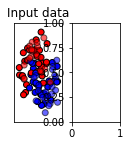

In [8]:
# Set up graph
h = 0.02
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(2, len(algorithm_space) + 1, 1)

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax.set_title("Input data")
# Draw subplots
for i, name in enumerate(algorithm_space):
    ax = plt.subplot(2, len(algorithm_space) + 1, i+2)
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # see-classify
    clf = algorithm_space[name]()
    predictions = clf.evaluate(dataset)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    
    # Print fitness score
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')


plt.tight_layout()
